In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

# Escrow Inclusion Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an escrow inclusion sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [16]:
from subspace_model.experiment import escrow_inclusion_sweep_run

param_set_2 = dict(
    fund_tax_on_proposer_reward=0.5,
    fund_tax_on_storage_fees=0.5,
    slash_to_fund=0.5,
    SIMULATION_DAYS=140,
    SAMPLES=5,
)

# Run the simulation
sim_df = escrow_inclusion_sweep_run(**param_set_2)

# Set the index
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

In [17]:
sim_df.head()

delta_days  delta_blocks  circulating_supply  \
label    run days_passed                                                 
standard 1   0                   NaN           NaN                 NaN   
             1                   1.0       14400.0        1.320000e+07   
             2                   1.0       14400.0        2.626799e+07   
             3                   1.0       14400.0        3.920523e+07   
             4                   1.0       14400.0        5.201312e+07   

                           user_supply  issued_supply  sum_of_stocks  \
label    run days_passed                                               
standard 1   0                     NaN            NaN            NaN   
             1            1.320000e+07     13200000.0   3.000000e+09   
             2            2.626799e+07     26268000.0   3.000000e+09   
             3            3.920531e+07     39205320.0   3.000000e+09   
             4            5.201325e+07     52013266.8   3.000000e+09   

                          block_utilization  dsf_relative_disbursal_per_day  \
label    run days_passed                                                      
standard 1   0                          NaN                             0.0   
             1                     0.000002                             0.0   
             2                     0.000003                             0.0   
             3                     0.000001                             0.0   
             4                     0.000003                             0.0   

                          reward_issuance_balance  other_issuance_balance  \
label    run days_passed                                                    
standard 1   0                       1.320000e+09            1.680000e+09   
             1                       1.306800e+09            1.680000e+09   
             2                       1.293732e+09            1.680000e+09   
             3                       1.280795e+09            1.680000e+09   
             4                       1.267987e+09            1.680000e+09   

                          ...  std_transaction_size  min_transaction_size  \
label    run days_passed  ...                                               
standard 1   0            ...                   100                   100   
             1            ...                   100                   100   
             2            ...                   100                   100   
             3            ...                   100                   100   
             4            ...                   100                   100   

                          avg_bundle_size  std_bundle_size  min_bundle_size  \
label    run days_passed                                                      
standard 1   0                       1500             1000              250   
             1                       1500             1000              250   
             2                       1500             1000              250   
             3                       1500             1000              250   
             4                       1500             1000              250   

                          avg_transaction_count_per_day  \
label    run days_passed                                  
standard 1   0                                  14400.0   
             1                                  14400.0   
             2                                  14400.0   
             3                                  14400.0   
             4                                  14400.0   

                          avg_bundle_count_per_day  avg_slash_per_day  \
label    run days_passed                                                
standard 1   0                             86400.0                0.1   
             1                             86400.0                0.1   
             2                             86400.0                0.1   
             3                     

[Text(0.5, 1.0, 'AB Test Circulating Supply')]

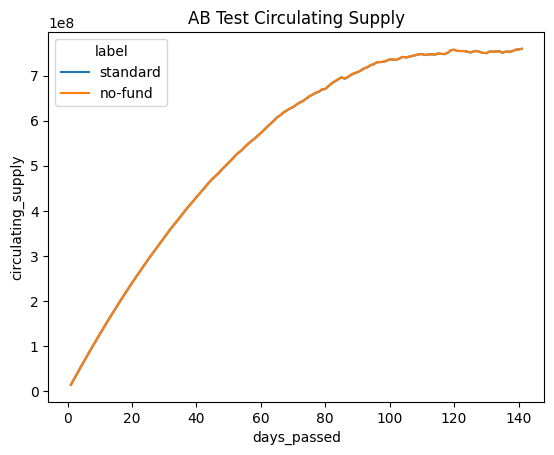

In [18]:
sns.lineplot(sim_df, x='days_passed', y='circulating_supply', hue='label').set(title='AB Test Circulating Supply')

[Text(0.5, 1.0, 'AB Test Operator Pool Shares')]

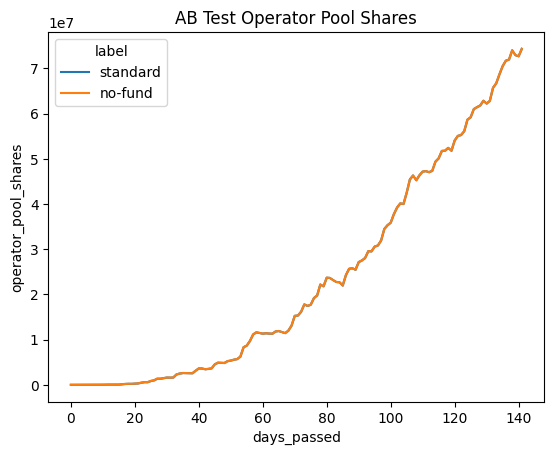

In [19]:
sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares', hue='label').set(title='AB Test Operator Pool Shares')

[Text(0.5, 1.0, 'AB Test Nominator Pool Shares')]

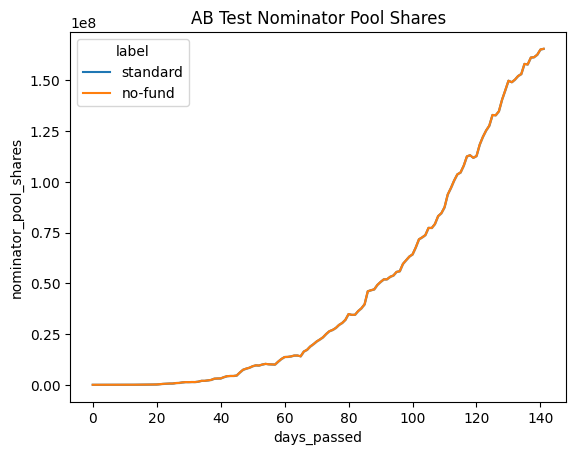

In [20]:
sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares', hue='label').set(title='AB Test Nominator Pool Shares')

[Text(0.5, 1.0, 'AB Test Block Utilization')]

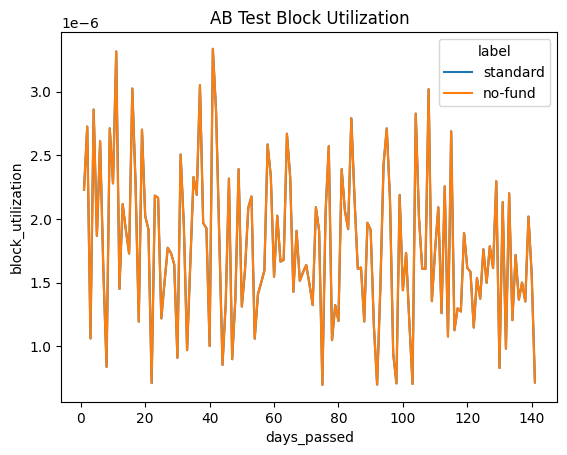

In [21]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization', hue='label').set(title='AB Test Block Utilization')

[Text(0.5, 1.0, 'AB Test Windowed Volatility of Circulating Supply')]

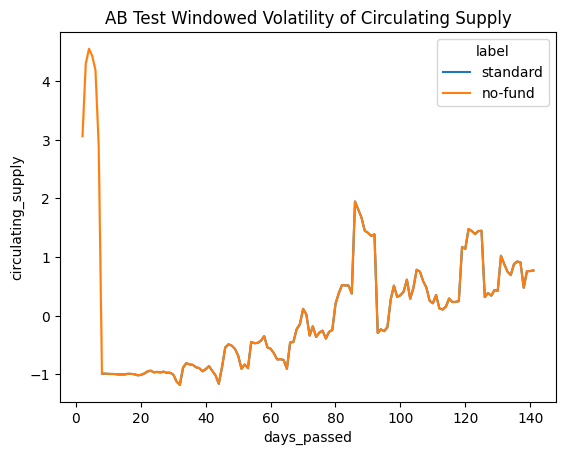

In [22]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply', hue='label').set(title='AB Test Windowed Volatility of Circulating Supply')